In [90]:
#%pip install matplotx

import requests
import matplotx
import pandas as pd
import matplotlib.pyplot as plt

In [158]:
#%pip install fredapi
#%pip install pytrends
#%pip install yfinance
#%pip install finpy-tse==1.2.6
#%pip install pytse_client

import pytrends
import yfinance as yf
from fredapi import Fred
# import finpy_tse as tse
import pytse_client as tse
from pytrends.request import TrendReq
from persiantools.jdatetime import JalaliDate

In [162]:
fred = Fred(api_key='5bc31fcec2681d6fff569153f9d526a5')

In [163]:
case_shiller = fred.get_series('CSUSHPINSA')
case_shiller

1975-01-01        NaN
1975-02-01        NaN
1975-03-01        NaN
1975-04-01        NaN
1975-05-01        NaN
               ...   
2023-01-01    292.716
2023-02-01    293.348
2023-03-01    297.139
2023-04-01    301.480
2023-05-01    305.146
Length: 581, dtype: float64

In [93]:
gspc_df = yf.download(tickers = "^GSPC", interval = "1d")
gspc_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...
2023-07-31,4584.819824,4594.220215,4573.140137,4588.959961,4588.959961,4503600000
2023-08-01,4578.830078,4584.620117,4567.529785,4576.729980,4576.729980,4042370000
2023-08-02,4550.930176,4550.930176,4505.750000,4513.390137,4513.390137,4270710000


In [117]:
nasdaq_df = yf.download(tickers = "^IXIC", interval = "1d")
nasdaq_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0
1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0
1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0
1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0
1971-02-11,101.449997,101.449997,101.449997,101.449997,101.449997,0
...,...,...,...,...,...,...
2023-07-31,14337.900391,14370.910156,14292.750000,14346.019531,14346.019531,4934440000
2023-08-01,14274.929688,14309.209961,14215.639648,14283.910156,14283.910156,4633770000
2023-08-02,14132.730469,14133.849609,13914.809570,13973.450195,13973.450195,5481960000


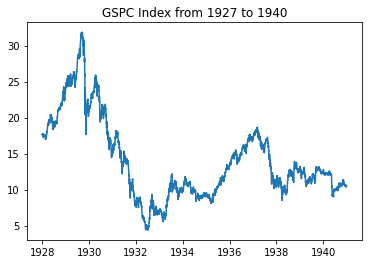

In [120]:
plt.plot(gspc_df[(gspc_df.index > '1927-12-29') & (gspc_df.index < '1940-12-31')]['Adj Close'])
plt.title("GSPC Index from 1927 to 1940")
plt.show()

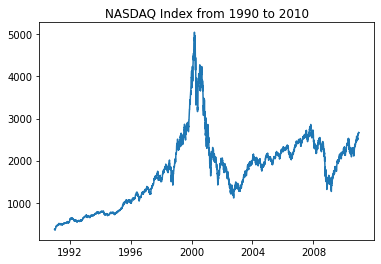

In [149]:
plt.plot(nasdaq_df[(nasdaq_df.index > '1990-12-29') & (nasdaq_df.index < '2010-12-31')]['Adj Close'])
plt.title("NASDAQ Index from 1990 to 2010")
plt.show()

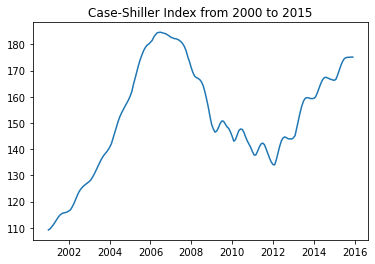

In [167]:
plt.plot(case_shiller[(case_shiller.index > '2000-12-29') & (case_shiller.index < '2015-12-31')])
plt.title("Case-Shiller Index from 2000 to 2015")
plt.show()

In [113]:
def show_ngram_viewer(content, year_start, year_end):
    params = {
        "content": content,
        "year_start": year_start,
        "year_end": year_end
    }
    html = requests.get("https://books.google.com/ngrams/json", params=params, timeout=30).text
    time_series = pd.read_json(html, typ="series")

    year_values = list(range(int(params['year_start']), int(params['year_end']) + 1))

    for series in time_series:
        plt.plot(year_values, series["timeseries"], label=series["ngram"])

    plt.title("Google Books Ngram Viewer", pad=10)
    matplotx.line_labels()  # https://stackoverflow.com/a/70200546/15164646

    plt.xticks(list(range(int(params['year_start']), int(params['year_end']) + 1, int((params['year_end']-params['year_start'])/5))))
    plt.grid(axis="y", alpha=0.3)

    plt.ylabel("%", labelpad=5)
    plt.xlabel(f"Year: {params['year_start']}-{params['year_end']}", labelpad=5)
    plt.show()

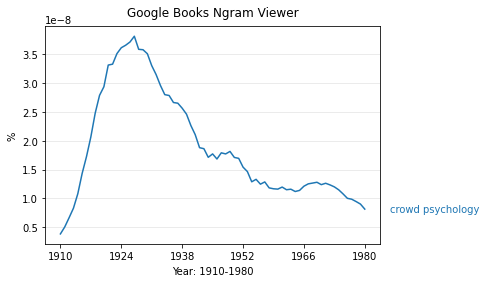

In [98]:
show_ngram_viewer(content='crowd psychology', 
                  year_start=1910, 
                  year_end=1980)

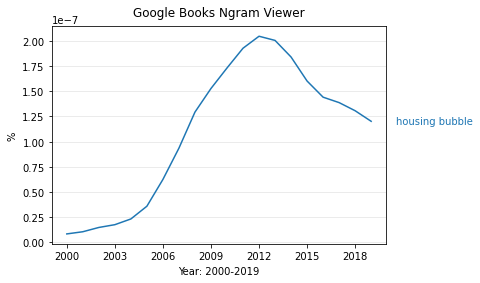

In [29]:
show_ngram_viewer(content='housing bubble', 
                  year_start=2000, 
                  year_end=2019)

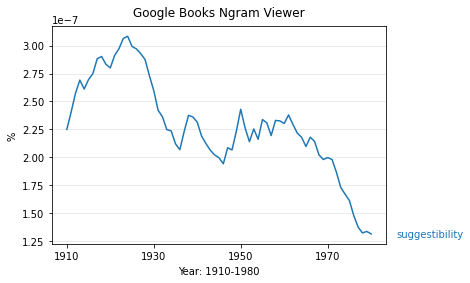

In [7]:
show_ngram_viewer(content='suggestibility', 
                  year_start=1910, 
                  year_end=1980)

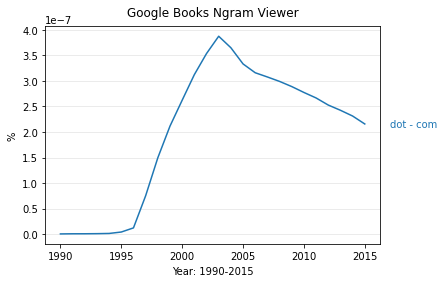

In [124]:
show_ngram_viewer(content='dot-com', 
                  year_start=1990, 
                  year_end=2015)

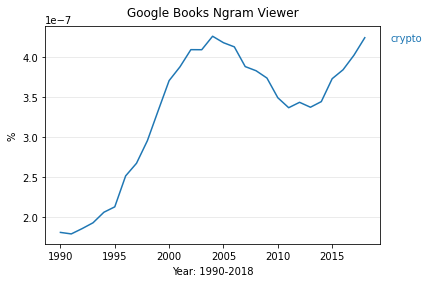

In [127]:
show_ngram_viewer(content='crypto', 
                  year_start=1990, 
                  year_end=2018)

In [143]:
def show_trends(key_words, timeframe='all'):
    pytrends = TrendReq(hl='en-US', tz=360)

    # build payload
    pytrends.build_payload(key_words, cat=0, timeframe=timeframe)

    data = pytrends.interest_over_time() 
    data = data.reset_index()

    for key_word in key_words:
        plt.plot(data['date'], data[key_word], label=key_word)
    plt.title("Google Trends Viewer", pad=10)
    plt.legend()
    plt.show()

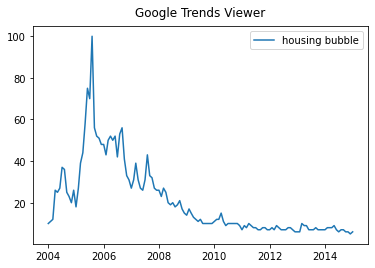

In [168]:
show_trends(['housing bubble'], '2000-01-01 2015-01-01')

## Tehran Stock Exchange (TSE)

In [57]:
tse_index = tse.FinancialIndex(symbol="شاخص کل").history
numeric_cols = ['high', 'low', 'open', 'close', 'volume']
tse_index[numeric_cols] = tse_index[numeric_cols].apply(pd.to_numeric, errors='coerce')

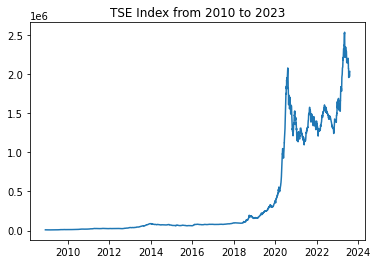

In [169]:
plt.plot(tse_index['date'], tse_index['close'])
plt.title("TSE Index from 2010 to 2023")
plt.show()

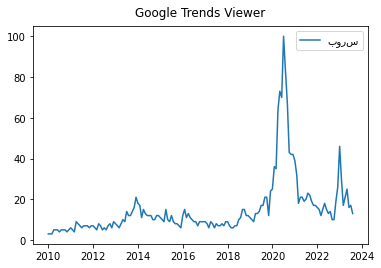

In [145]:
show_trends(['بورس'], '2010-01-01 2024-01-01')